<a href="https://colab.research.google.com/github/jcastanonv/CellCountingCSRNet/blob/main/CellCounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.io as io
from PIL import Image
import os
import glob
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from tqdm import tqdm

from matplotlib import cm as CM
%matplotlib inline

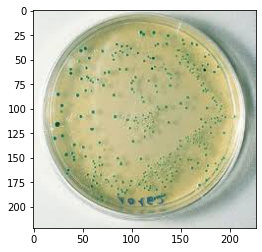

In [12]:
img = plt.imread('../content/drive/MyDrive/CellCount/CellCountingCSRNet/Images/images.jpg')
plt.imshow(img)

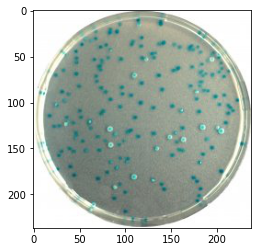

In [13]:
img2 = plt.imread('../content/drive/MyDrive/CellCount/CellCountingCSRNet/Images/000038-237x237.jpg')
plt.imshow(img2)

In [15]:
def gaussian_filter_density(gt):
  density = np.zeros(gt.shape, dtype=np.float32)
  gt_count = np.count_nonzero(gt)
  if gt_count == 0:
    return density
  
  pts = np.array(list(zip(np.nonzeros(gt)[1].ravel(), np.nonzeros(gt)[0])))
  leaf_size = 2048

  tree = scipy.spatial.KDTree(pts.copy(), leafsize=leaf_size)

  distances, locations = tree.query(pts, k=4)

  for i, pt in enumerate(pts):
    pt2d = np.zeros(gt.shape, dtype=np.float32)
    pt2d[pt[1], pt[0]] = 1.
    if gt_count > 1:
      sigma = (distances[i][1] + distances[i][2] + distances[i][3])*0.1
    else:
      sigma = np.average(np.array(gt.shape))/2./2.
    
    density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
  return density

In [27]:
k = np.zeros((img2.shape[0], img2.shape[1]))
g = gaussian_filter_density(k) 
groundtruth = np.asarray(g)

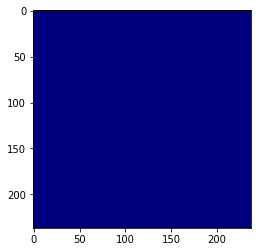

In [28]:
plt.imshow(groundtruth, cmap=CM.jet)

In [25]:
g

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)